import dataset

In [ ]:
# Import Library yang diperlukan
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATA-KLASIFIKASI.xlsx to DATA-KLASIFIKASI.xlsx


In [ ]:
df=pd.read_excel('DATA-KLASIFIKASI.xlsx')

In [ ]:
df

,Timestamp,Nama,Umur,Jenis Kelamin,Domisili,Pekerjaan,Apakah anda mengetahui E-Commerce?,E-commerce mana yang sering anda gunakan?,Apa alasan anda menggunakan platform tersebut?,Bagaimana kualitas barang/produk yang anda beli?,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,2/3/2023 15:13:26,rista kesia hutasoit,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/3/2023 15:27:57,ABDUL WAHID HASIBUAN,15 - 25 tahun,Laki-laki,Medan,pelajar,Iya,Shopee,Event menarik,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/3/2023 15:30:56,ABEDNEGO MARULI HOTASI SINAGA,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/3/2023 15:33:21,ABRAHAM MANALU,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/3/2023 15:34:30,ANDI SANJAYA SIMANJUNTAK,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,3/21/2023 14:17:01,Intan lestari,15 - 25 tahun,Perempuan,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,3/21/2023 14:17:24,Gusti,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,3/21/2023 14:17:37,AYUDIA,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,3/21/2023 14:18:17,Muhammad rahul,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns)

Index(['Timestamp', 'Nama', 'Umur', 'Jenis Kelamin', 'Domisili', 'Pekerjaan',
       'Apakah anda mengetahui E-Commerce? ',
       'E-commerce mana yang sering anda gunakan?',
       'Apa alasan anda menggunakan platform tersebut? ',
       'Bagaimana kualitas barang/produk yang anda beli?',
       'Bagaimana respon/kenyamanan chat to seller?',
       'Bagaimana tampilan dari platfrom tersebut?',
       'Bagaimana performa dari platfrom tersebut?',
       'Bagaimana privasi atau keamanan akun tersebut?',
       'Bagaimana pengemasan barang/produk tersebut?',
       'Bagaimana harga dari produk platfrom tersebut? ',
       'Apakah anda puas menggunakan platfrom tersebut? ',
       'Bagaimana dengan keaslian barang/produk? ',
       'Jenis produk yang dibeli?',
       'Harapan anda untuk meningkatkan fitur mengenai platfrom tersebut?',
       'Diantara transaksi ini mana yang sering anda gunakan? ', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       

In [ ]:
# menghapus column yang tidak diperlukan
df = df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
              'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
              'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
              'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
              'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
              'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
              'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
              'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
              'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
              'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70',
              'Unnamed: 71'], axis=1)

In [ ]:
df

,Timestamp,Nama,Umur,Jenis Kelamin,Domisili,Pekerjaan,Apakah anda mengetahui E-Commerce?,E-commerce mana yang sering anda gunakan?,Apa alasan anda menggunakan platform tersebut?,Bagaimana kualitas barang/produk yang anda beli?,...,Bagaimana tampilan dari platfrom tersebut?,Bagaimana performa dari platfrom tersebut?,Bagaimana privasi atau keamanan akun tersebut?,Bagaimana pengemasan barang/produk tersebut?,Bagaimana harga dari produk platfrom tersebut?,Apakah anda puas menggunakan platfrom tersebut?,Bagaimana dengan keaslian barang/produk?,Jenis produk yang dibeli?,Harapan anda untuk meningkatkan fitur mengenai platfrom tersebut?,Diantara transaksi ini mana yang sering anda gunakan?
0,2/3/2023 15:13:26,rista kesia hutasoit,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Cod
1,2/3/2023 15:27:57,ABDUL WAHID HASIBUAN,15 - 25 tahun,Laki-laki,Medan,pelajar,Iya,Shopee,Event menarik,5,...,5,4,4,5,5,5,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
2,2/3/2023 15:30:56,ABEDNEGO MARULI HOTASI SINAGA,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
3,2/3/2023 15:33:21,ABRAHAM MANALU,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Cod
4,2/3/2023 15:34:30,ANDI SANJAYA SIMANJUNTAK,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,3,4,4,4,4,4,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Shoppepay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,3/21/2023 14:17:01,Intan lestari,15 - 25 tahun,Perempuan,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,4,5,5,5,Asli,Peralaan rumah tangga,Memberikan penjelasan mengenai tujuan dan peng...,Cod
998,3/21/2023 14:17:24,Gusti,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,5,4,4,4,4,5,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
999,3/21/2023 14:17:37,AYUDIA,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,4,...,3,4,4,4,4,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Shoppepay
1000,3/21/2023 14:18:17,Muhammad rahul,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,4,...,5,5,5,5,5,5,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Shoppepay


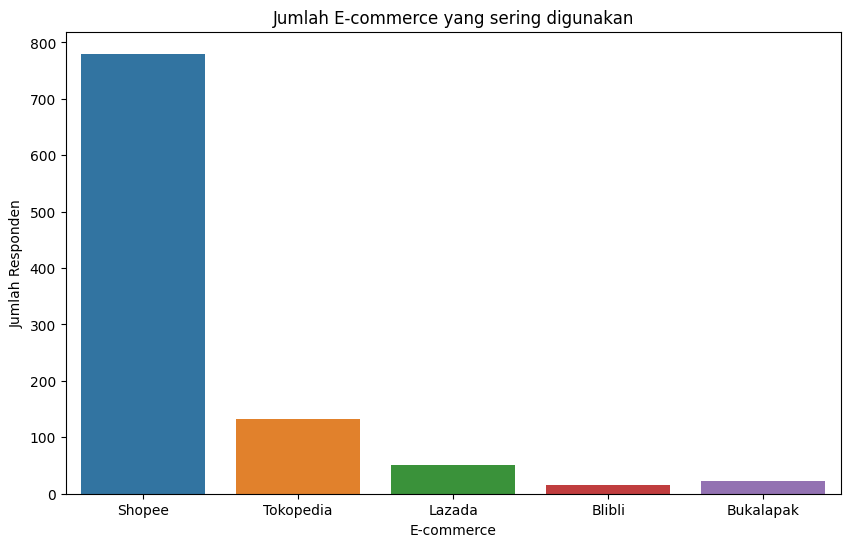

In [ ]:
# Membuat Grafik E-commerce yang sering digunakan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='E-commerce mana yang sering anda gunakan?')
plt.xlabel('E-commerce')
plt.ylabel('Jumlah Responden')
plt.title('Jumlah E-commerce yang sering digunakan')

# Menampilkan grafik
plt.show()

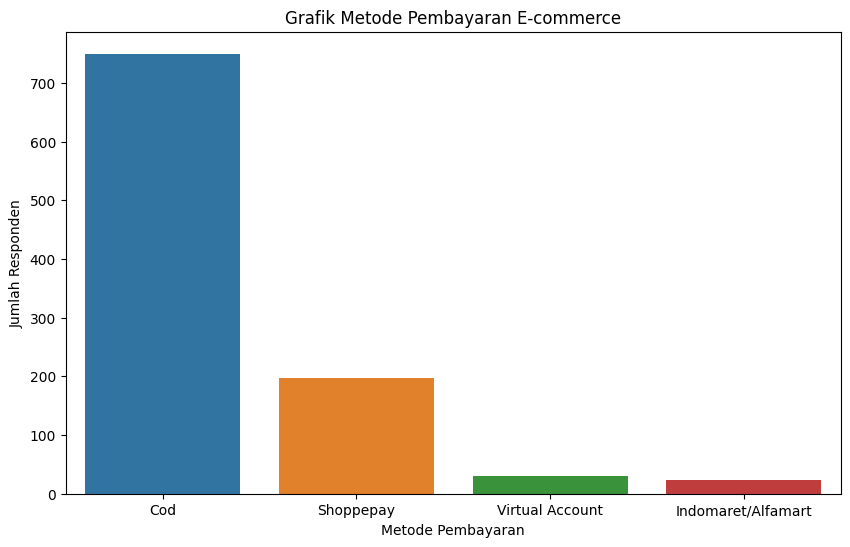

In [ ]:
# Membuat Grafik Metode Pembayaran E-commerce
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Diantara transaksi ini mana yang sering anda gunakan? ')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Responden')
plt.title('Grafik Metode Pembayaran E-commerce')

# Menampilkan grafik
plt.show()

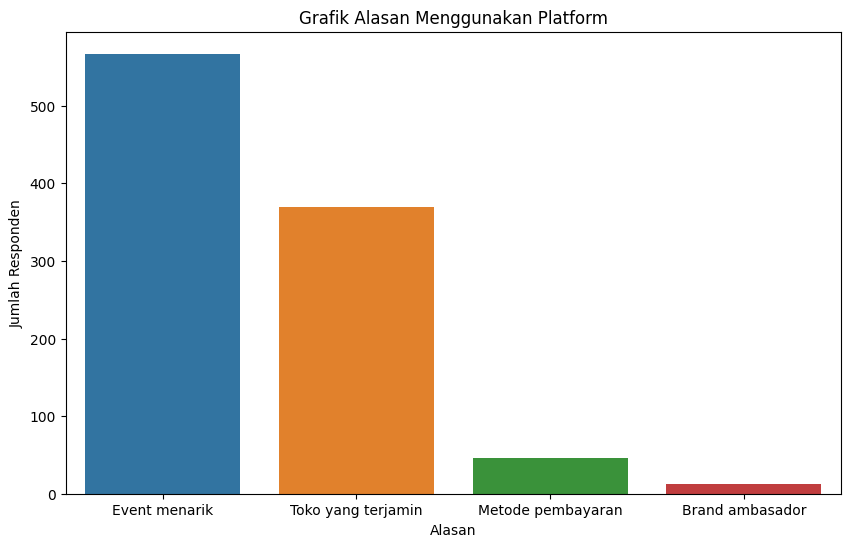

In [ ]:
# Membuat Grafik Alasan menggunakan platform
reason_counts = df['Apa alasan anda menggunakan platform tersebut? '].value_counts().nlargest(4)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Apa alasan anda menggunakan platform tersebut? ', order=reason_counts.index)
plt.xlabel('Alasan')
plt.ylabel('Jumlah Responden')
plt.title('Grafik Alasan Menggunakan Platform')

# Menampilkan grafik
plt.show()

In [ ]:
# Mencek column agar bisa diolah ( pastikan bentuknya int 64)
df.dtypes

Timestamp                                                            object
Nama                                                                 object
Umur                                                                 object
Jenis Kelamin                                                        object
Domisili                                                             object
Pekerjaan                                                            object
Apakah anda mengetahui E-Commerce?                                   object
E-commerce mana yang sering anda gunakan?                            object
Apa alasan anda menggunakan platform tersebut?                       object
Bagaimana kualitas barang/produk yang anda beli?                      int64
Bagaimana respon/kenyamanan chat to seller?                           int64
Bagaimana tampilan dari platfrom tersebut?                            int64
Bagaimana performa dari platfrom tersebut?                            int64
Bagaimana pr

METODE KNN

In [ ]:
# Memilih kolom yang diperlukan
col_names = df.columns.tolist()
selected_columns = ['Bagaimana kualitas barang/produk yang anda beli?',
                    'Bagaimana respon/kenyamanan chat to seller?',
                    'Bagaimana tampilan dari platform tersebut?',
                    'Bagaimana performa dari platform tersebut?',
                    'Bagaimana privasi atau keamanan akun tersebut?',
                    'Bagaimana pengemasan barang/produk tersebut?',
                    'Bagaimana harga dari produk platform tersebut?',
                    'Apakah anda puas menggunakan platform tersebut?']

selected_dataset = df[[col for col in col_names if col in selected_columns]]

In [ ]:
# Memisahkan fitur dan label
X = selected_dataset.iloc[:, :-1].values  # Fitur
y = selected_dataset.iloc[:, -1].values   # Label

In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
# Memisahkan data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model KNN
k = 5  # Nilai K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Melakukan prediksi pada data test
y_pred = knn.predict(X_test)

In [ ]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred) * 100
print("Akurasi KNN: {:.2f}%".format(accuracy))

Akurasi KNN: 84.08%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Menghitung recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Precision: 0.8308191808191808
Recall: 0.854398544520548
F1-score: 0.8352121336339413


In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[103  25]
 [  7  66]]


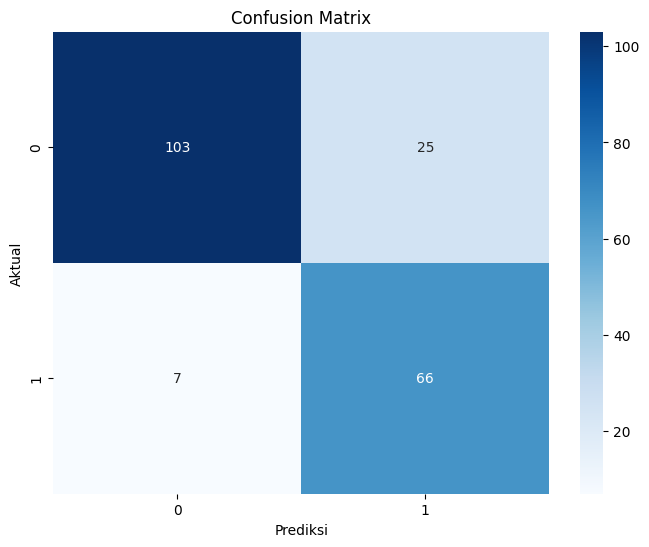

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk grafik heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
#Memilih data pelanggan yang menggunakan Shopee
shopee_df = df.query('`E-commerce mana yang sering anda gunakan?` == "Shopee"')
shopee_df

,Timestamp,Nama,Umur,Jenis Kelamin,Domisili,Pekerjaan,Apakah anda mengetahui E-Commerce?,E-commerce mana yang sering anda gunakan?,Apa alasan anda menggunakan platform tersebut?,Bagaimana kualitas barang/produk yang anda beli?,...,Bagaimana tampilan dari platfrom tersebut?,Bagaimana performa dari platfrom tersebut?,Bagaimana privasi atau keamanan akun tersebut?,Bagaimana pengemasan barang/produk tersebut?,Bagaimana harga dari produk platfrom tersebut?,Apakah anda puas menggunakan platfrom tersebut?,Bagaimana dengan keaslian barang/produk?,Jenis produk yang dibeli?,Harapan anda untuk meningkatkan fitur mengenai platfrom tersebut?,Diantara transaksi ini mana yang sering anda gunakan?
0,2/3/2023 15:13:26,rista kesia hutasoit,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Cod
1,2/3/2023 15:27:57,ABDUL WAHID HASIBUAN,15 - 25 tahun,Laki-laki,Medan,pelajar,Iya,Shopee,Event menarik,5,...,5,4,4,5,5,5,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
2,2/3/2023 15:30:56,ABEDNEGO MARULI HOTASI SINAGA,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
3,2/3/2023 15:33:21,ABRAHAM MANALU,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,5,5,5,4,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Cod
4,2/3/2023 15:34:30,ANDI SANJAYA SIMANJUNTAK,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,3,4,4,4,4,4,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Shoppepay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,3/21/2023 14:17:01,Intan lestari,15 - 25 tahun,Perempuan,Binjai,Mahasiswa,Iya,Shopee,Event menarik,5,...,5,5,4,5,5,5,Asli,Peralaan rumah tangga,Memberikan penjelasan mengenai tujuan dan peng...,Cod
998,3/21/2023 14:17:24,Gusti,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Shopee,Toko yang terjamin,4,...,5,4,4,4,4,5,Asli,Pakaian,Membuat tampilan yang mudah dipahami pengguna ...,Cod
999,3/21/2023 14:17:37,AYUDIA,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Shopee,Event menarik,4,...,3,4,4,4,4,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Shoppepay
1000,3/21/2023 14:18:17,Muhammad rahul,15 - 25 tahun,Laki-laki,Binjai,Mahasiswa,Iya,Shopee,Event menarik,4,...,5,5,5,5,5,5,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Shoppepay


In [ ]:
# Menghitung jumlah kemunculan setiap nilai kepuasan
value_counts = shopee_df['Apakah anda puas menggunakan platfrom tersebut? '].value_counts()

# Menghitung total kepuasan berdasarkan aturan
total = (value_counts * value_counts.index).sum()

# Menghitung persentase kepuasan
percentage = (total / (len(shopee_df) * 5)) * 100

# Menampilkan hasil
print("Kepuasan pelanggan terhadap E-commerce Shopee: %.2f%%" % percentage)

Kepuasan pelanggan terhadap E-commerce Shopee: 82.97%


In [ ]:
#Memilih data pelanggan yang menggunakan Tokopedia
tokopedia_df = df.query('`E-commerce mana yang sering anda gunakan?` == "Tokopedia"')
tokopedia_df

,Timestamp,Nama,Umur,Jenis Kelamin,Domisili,Pekerjaan,Apakah anda mengetahui E-Commerce?,E-commerce mana yang sering anda gunakan?,Apa alasan anda menggunakan platform tersebut?,Bagaimana kualitas barang/produk yang anda beli?,...,Bagaimana tampilan dari platfrom tersebut?,Bagaimana performa dari platfrom tersebut?,Bagaimana privasi atau keamanan akun tersebut?,Bagaimana pengemasan barang/produk tersebut?,Bagaimana harga dari produk platfrom tersebut?,Apakah anda puas menggunakan platfrom tersebut?,Bagaimana dengan keaslian barang/produk?,Jenis produk yang dibeli?,Harapan anda untuk meningkatkan fitur mengenai platfrom tersebut?,Diantara transaksi ini mana yang sering anda gunakan?
9,2/3/2023 15:40:28,ANDIKA CHANDRA,15 - 25 tahun,Laki-laki,Siantar,pelajar,Iya,Tokopedia,Event menarik,3,...,3,4,5,3,4,3,Asli,Elektronik,Membuat tampilan yang mudah dipahami pengguna ...,Cod
20,2/3/2023 15:56:28,ADVENT TORAS MARBUN,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,3,...,3,4,2,4,4,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Cod
34,2/3/2023 16:15:24,Andry Alberto Hutasoit,15 - 25 tahun,Laki-laki,Siantar,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,5,...,3,5,4,5,5,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Cod
38,2/3/2023 16:19:16,Angelin,26 - 35 tahun,Perempuan,Medan,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,5,...,5,5,5,5,5,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Cod
46,2/3/2023 16:28:36,AHMAD RIFAI,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,5,...,5,5,5,5,5,4,Asli,Pakaian,Memberikan pemberitahuan mengenai produk apa s...,Cod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,3/21/2023 14:07:29,BAYU,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Tokopedia,Event menarik,4,...,4,4,4,4,4,4,Asli,Pakaian,Memberikan penjelasan mengenai tujuan dan peng...,Cod
974,3/21/2023 14:10:07,Vega Liana,15 - 25 tahun,Perempuan,Surabaya,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,4,...,4,4,4,4,4,4,Asli,Pakaian,Memberikan penjelasan mengenai tujuan dan peng...,Cod
981,3/21/2023 14:12:46,HASANUDDIN,15 - 25 tahun,Laki-laki,Medan,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,4,...,4,4,4,4,3,4,Asli,Pakaian,Memberikan penjelasan mengenai tujuan dan peng...,Cod
984,3/21/2023 14:13:37,Henny,15 - 25 tahun,Perempuan,Medan,Mahasiswa,Iya,Tokopedia,Toko yang terjamin,4,...,4,4,4,4,4,4,Asli,Pakaian,Memberikan penjelasan mengenai tujuan dan peng...,Cod


In [ ]:
# Menghitung jumlah kemunculan setiap nilai kepuasan
value_counts = tokopedia_df['Apakah anda puas menggunakan platfrom tersebut? '].value_counts()

# Menghitung total kepuasan berdasarkan aturan
total = (value_counts * value_counts.index).sum()

# Menghitung persentase kepuasan
percentage = (total / (len(tokopedia_df) * 5)) * 100

# Menampilkan hasil
print("Kepuasan pelanggan terhadap E-commerce Tokopedia: %.2f%%" % percentage)

Kepuasan pelanggan terhadap E-commerce Tokopedia: 80.30%
